# Investigate 16 Cyg

Rafa has given me two new lightcurves for Q7 through Q17 for 16 Cyg A & B. These are closer to the ones that Davies et al. (2015) used in their benchmark analysis of 16 Cyg A & B. I'm going to check:

- How the baseline differs
- Which modes we can exclude to improve the analysis speed

In [7]:
import numpy as np
from astropy.io import ascii
from astropy.io import fits
import glob
import pandas as pd
from tqdm import tqdm

In [57]:
mal.loc[mal.KIC == 12069424]

,KIC,Teff,age,dnu,eTeff,ednu,efeh,enumax,evsini,feh,...,modrad,numax,source,upage,upmodlogg,upmodmass,upmodrad,vsini,G,bprp
62,12069424,5825,6.6735,103.277,50,0.021,0.03,4.6,0.5,0.1,...,1.2156,2188.5,L,0.8145,0.0066,0.019,0.012,2.8,5.80321,0.820117


Read in the data

In [104]:
cop = pd.read_csv('../../data/copper.csv', index_col=0)
cop = cop[cop.l != 3]
mal = pd.read_csv('../../data/malatium.csv', index_col=0)
dnuA = mal.loc[mal.KIC == 12069424].dnu.values
dnuB = mal.loc[mal.KIC == 12069449].dnu.values
A = cop.loc[cop.KIC == '12069424']
B = cop.loc[cop.KIC == '12069449']

In [41]:
AK = ascii.read(glob.glob(f'../../data/*12069424*.pow')[0]).to_pandas()
BK = ascii.read(glob.glob(f'../../data/*12069449*.pow')[0]).to_pandas()

In [42]:
AG = fits.open(glob.glob(f'../../data/16Cyg/*100002741*PSD*.fits')[0])[0].data
BG = fits.open(glob.glob(f'../../data/16Cyg/*100002742*PSD*.fits')[0])[0].data

In [129]:
mal.iloc[60:65]

,KIC,Teff,age,dnu,eTeff,ednu,efeh,enumax,evsini,feh,...,modrad,numax,source,upage,upmodlogg,upmodmass,upmodrad,vsini,G,bprp
60,12009504,6179,3.9746,88.217,77,0.026,0.10,7.7,0.5,-0.08,...,1.4016,1865.6,L,0.5749,0.0055,0.0190,0.012,7.7,9.255096,0.692866
61,12069127,6276,2.0103,48.400,77,0.048,0.10,10.1,0.5,0.08,...,2.2983,884.7,L,0.1118,0.0044,0.0304,0.021,6.0,10.620140,0.678072
62,12069424,5825,6.6735,103.277,50,0.021,0.03,4.6,0.5,0.10,...,1.2156,2188.5,L,0.8145,0.0066,0.0190,0.012,2.8,5.803210,0.820117
63,12069449,5750,7.3922,116.929,50,0.012,0.02,5.0,0.5,0.05,...,1.0957,2561.3,L,0.8943,0.0055,0.0209,0.009,2.1,6.056811,0.831866
64,12258514,5964,4.0544,74.799,77,0.016,0.10,3.3,0.5,0.00,...,1.6055,1512.7,L,0.1757,0.0033,0.0095,0.012,3.9,8.008107,0.744375


Let's plot a comparison

In [43]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.set_context('poster')
sns.set_palette('colorblind')

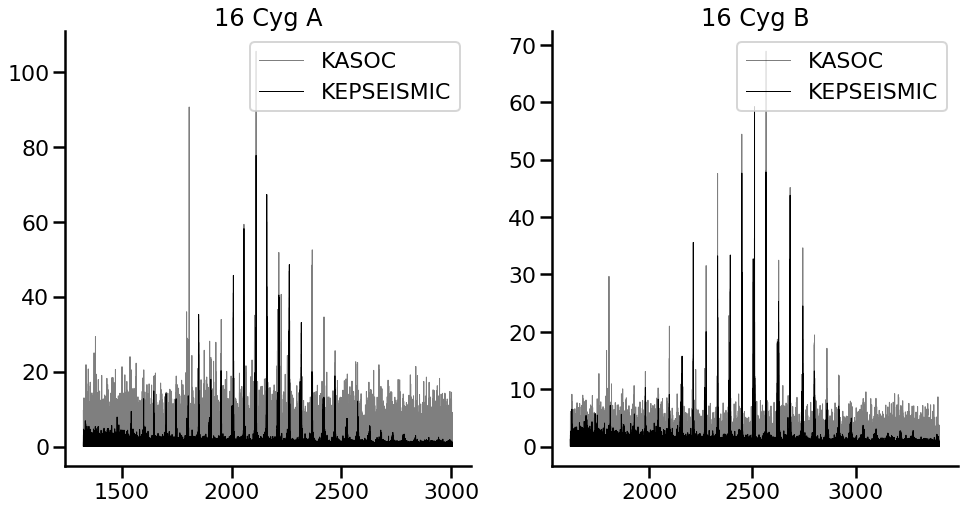

In [80]:
lo = A.Freq.min() - 0.1*dnuA[0]
hi = A.Freq.max() + 0.1*dnuA[0]
sK = (AK['col1'] > lo) & (AK['col1'] < hi)
sG = (AG[:,0]*1e6 > lo) & (AG[:,0]*1e6 < hi)

fig, axes = plt.subplots(1, 2, figsize=(16,8))
ax=axes[0]
ax.plot(AK['col1'][sK], AK['col2'][sK], alpha=.5, c='k', label='KASOC', lw=1)
ax.plot(AG[:,0][sG]*1e6, AG[:,1][sG], c='k', label='KEPSEISMIC', lw=1)
ax.legend(loc='upper right')
sns.despine()
ax.set_title('16 Cyg A')

lo = B.Freq.min() - 0.1*dnuB[0]
hi = B.Freq.max() + 0.1*dnuB[0]
sK = (BK['col1'] > lo) & (BK['col1'] < hi)
sG = (BG[:,0]*1e6 > lo) & (BG[:,0]*1e6 < hi)
ax=axes[1]
ax.plot(BK['col1'][sK], BK['col2'][sK], alpha=.5, c='k', label='KASOC', lw=1)
ax.plot(BG[:,0][sG]*1e6, BG[:,1][sG], c='k', label='KEPSEISMIC', lw=1)
ax.legend(loc='upper right')
sns.despine()
ax.set_title('16 Cyg B')
plt.show()

plt.show()

Let's compare the baselines

In [84]:
1e6/np.median(np.diff(AK['col1'])) / 3600 / 24 / 365

2.8810159765763443

In [105]:
print(f"The time baseline for KASOC A is:\
      {1e6/np.median(np.diff(AK['col1'])) / 3600 / 24 / 365:.2f} years")

print(f"The time baseline for KEPSEISMIC A is:\
      {1./np.median(np.diff(AG[:,0])) /3600/24/365:.2f} years")

The time baseline for KASOC A is:      2.88 years
The time baseline for KEPSEISMIC A is:      2.63 years


In [106]:
print(f"The time baseline for KASOC B is:\
      {1e6/np.median(np.diff(BK['col1'])) / 3600 / 24 / 365:.2f} years")

print(f"The time baseline for KEPSEISMIC B is:\
      {1./np.median(np.diff(BG[:,0])) /3600/24/365:.2f} years")

The time baseline for KASOC B is:      2.88 years
The time baseline for KEPSEISMIC B is:      2.63 years


Excluding modes

In [107]:
print(f"We will exclude {len(A.loc[A.lnK != 6])} modes with lnK < 6 in 16 Cyg A")
print(f"We will exclude {len(B.loc[B.lnK != 6])} modes with lnK < 6 in 16 Cyg B")

We will exclude 3 modes with lnK < 6 in 16 Cyg A
We will exclude 6 modes with lnK < 6 in 16 Cyg B


What about for our other poorly running target stars?

In [108]:
D = cop.loc[cop.KIC == '8006161']
print(f"We will exclude {len(D.loc[D.lnK != 6])} modes with lnK < 6 in Doris")

We will exclude 12 modes with lnK < 6 in Doris


In [112]:
R = cop.loc[cop.KIC == '7970740']
print(f"We will exclude {len(R.loc[R.lnK != 6])} modes with lnK < 6 in KIC 79707040, if it doesn't finish running.")

We will exclude 10 modes with lnK < 6 in KIC 79707040, if it doesn't finish running.


In [120]:
len(cop[(cop.l != 3) & (cop.lnK != 6)])

1435

In [122]:
R = cop.loc[cop.KIC == '8478994']
print(f"We will exclude {len(R.loc[R.lnK != 6])} modes with lnK < 6 in KIC 8478994, if it doesn't finish running.")

We will exclude 29 modes with lnK < 6 in KIC 8478994, if it doesn't finish running.


In [125]:
star = mal.loc[2]
star.KIC == '12069424'

False

In [126]:
allow = ['12069424', '12069449', '8006161', '79607040']
if star.KIC not in allow:
    print('hi')

hi


In [127]:
if star.KIC not in allow:
    raise ValueError("This KIC not allowed")

ValueError: This KIC not allowed